In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * 
import requests
import math
import re
import csv
import mplhep as hep

## Comparing Run 2 and Run 3 trigger rates: checking single- and double-objects seeds representative of each object type

#### Ephemeral HLTPhysics 2022 (Run D) - run 357688: 4819637 events (50 LS in LS = [35,84] for PU=52: events)                                                                                                                                                                      
L1Ntuples ZB2022: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run357688/
 
#### Ephemeral HLTPhysics 2018 (Run D) - run 325097: 672287 events (35  LS in LS = [58,93] for PU=52: events)                                                                                                                                                                        
L1Ntuples ZB2018: /eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/elfontan/condor/EphemeralZBHLTPhysics_data_run325097/


In [5]:
# Lists for rate computation
rate_muon_algo_Run2 = []

# Countings and thresholds
# MU #
mu_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26, 27]
n_SingleMu_Countings =  [44830, 42134, 40675, 37996, 35512, 33356, 29102, 27307]

# EG #
eg_pt_thresholds =  [32, 33, 34, 35, 36, 37, 38, 39, 40]
n_SingleEG_Countings =  [109126, 100902, 92381, 84201, 76889, 70501, 64609, 59079, 54032]
doubleeg_pt_thresholds =  [20, 21, 22, 23, 24, 25, 26]
n_DoubleLooseIsoEG_Countings =  [0, 0, 0, 0, 0, 0, 0, 0]

# TAU #
tau_pt_thresholds =  [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
n_SingleTau_Countings =  [12993, 12683, 12394, 12120, 11848, 11574, 11346, 11082, 10854, 10605, 10401]
doubleisotau_pt_thresholds =  [30, 31, 32, 33, 34, 35, 36]
n_DoubleIsoTau_Countings =  [94959, 91583, 89054, 79823, 71396, 65048, 60121]

# JET #
jet_pt_thresholds =  [120, 125, 130, 135, 140, 145, 150, 155, 160]
n_SingleJet_Countings =  [53293, 47521, 42043, 37424, 33283, 29602, 26482, 23637, 21329]

# MET #
met_thresholds =  [70, 72, 75, 78, 80, 85, 90, 95, 100]
n_ETMHF_Countings =  [40232, 37808, 34570, 31902, 30283, 26888, 24250, 20225, 17389]


for mu in range(len(mu_pt_thresholds)):
    rate_muon_algo_Run2.append(n_SingleMu_Countings[mu] * 20/8 / (23.3*36))


#### Rate for ZeroBias/HLTPhysics
is given by: *Nevents passing * PS(HLT+L1 of ZeroBias/HLTPhysics) / (number of processed LS * 23.2s * N_bunch crossings)*,

where: *N_bunch crossings = 2544 for Fill 7333 (and 35 LS),  = 2400 for Fill 8142 (and 50 LS)*

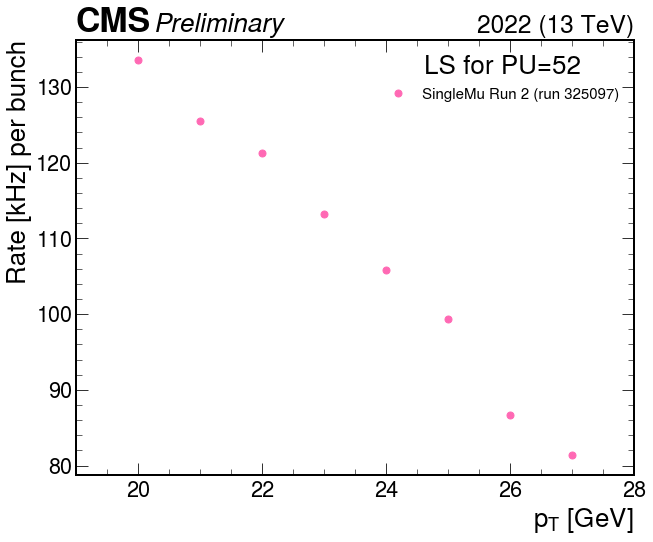

In [10]:
p_muon_LS_Run3, p_muon_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

#p_muon_LS_Run3 = plt.plot(mu_thr, rate_muon_algo_LS_Run3, '*', color="blue", markersize=10, label = "SingleMu Run 3 (run 357688)")
p_muon_LS_Run2 = plt.plot(mu_pt_thresholds, rate_muon_algo_Run2, '.', color="hotpink", markersize=14, label = "SingleMu Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(19., 28.)
#plt.ylim(0., 1)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)

In [ ]:
p_eg_LS_Run3, p_eg_LS_Run2 = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 25})

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=True, year="2022")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

p_eg_LS_Run3 = plt.plot(eg_thr, rate_eg_algo_LS_Run3, '*', color="blue", markersize=10, label = "SingleEG Run 3 (run 357688)")
p_eg_LS_Run2 = plt.plot(eg_thr, rate_eg_algo_LS_Run2, '.', color="hotpink", markersize=14, label = "SingleEG Run 2 (run 325097)")

plt.xlabel('$p_{T}$ [GeV]')
plt.ylabel('Rate [kHz] per bunch')
plt.xlim(34., 42.)
plt.ylim(0., 0.04)
#p_muon_Run3 = plt.text(25., 0.04, "LS for PU=52", fontsize=20, color="black", fontweight='bold')
plt.legend(loc='upper right', title="LS for PU=52", fontsize='xx-small')
#plt.tight_layout()
#plt.show()
#plt.savefig('singleMu.pdf', dpi=1200)
#plt.savefig('singleMu.png', dpi=1200)